In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [96]:
final = pd.read_csv("outputs/final_output.csv")
cluster_analysis = pd.read_csv("outputs/cluster_analysis.csv")
profiles = pd.read_csv("outputs/cluster_profiles.csv")

In [97]:
#  restore MultiIndex for cluster_analysis table
cluster_analysis["cluster"] = cluster_analysis["cluster"].astype(int)
cluster_analysis = cluster_analysis.set_index(["cluster", "cluster_name"])

In [98]:
final.head()

,MEMBER_ID,total_orders,total_items,total_units,gross_product_spend,order_adj_total,shipping_total,tax_total,unique_products,unique_types,...,REGISTRATION,LASTSESSION,REGISTRATIONUPDATE,LOGONID,EMAIL,NAME,recency,frequency,monetary,cluster
0,3003,2,2,2,100.0,-10.00,0.00,0.0,1,1,...,2025-11-20,2025-11-20,2025-11-20,pkumar,pkumar@solveda.com,Pranav Kumar,11,2,90.00,4
1,4002,2,2,2,255.0,-27.38,11.88,0.0,2,1,...,2025-11-21,2025-11-25,2025-11-21,robertdowneyjr1@yopmail.com,robertdowneyjr1@yopmail.com,Robert Downey Jr,6,2,227.62,4
2,4003,1,3,3,3342.0,-191.76,86.76,0.0,3,1,...,2025-11-21,2025-11-21,2025-11-21,johnchambers@yopmail.com,johnchambers@yopmail.com,John Chambers,10,1,3150.24,4
3,4004,2,12,12,16256.0,-467.96,162.36,0.0,11,1,...,2025-11-21,2025-11-21,2025-11-21,andymurray@yopmail.com,andymurray@yopmail.com,Andy Murray,10,2,15788.04,2
4,4005,2,3,3,319.0,-36.70,19.80,0.0,3,1,...,2025-11-21,2025-11-21,2025-11-21,michaels@yopmail.com,michaels@yopmail.com,Michael S,10,2,282.30,4


In [99]:
final.columns

Index(['MEMBER_ID', 'total_orders', 'total_items', 'total_units',
       'gross_product_spend', 'order_adj_total', 'shipping_total', 'tax_total',
       'unique_products', 'unique_types', 'unique_brands', 'promo_orders',
       'promo_adj_total', 'last_purchase', 'first_purchase', 'net_spend',
       'avg_order_value', 'avg_units_per_order', 'days_since_last_purchase',
       'purchase_span_days', 'shipping_ratio', 'top_type', 'top_type_share',
       'REGISTERTYPE', 'LASTORDER', 'REGISTRATION', 'LASTSESSION',
       'REGISTRATIONUPDATE', 'LOGONID', 'EMAIL', 'NAME', 'recency',
       'frequency', 'monetary', 'cluster'],
      dtype='object')

In [100]:
cluster_analysis.head()

,,customer_count,avg_recency,avg_frequency,avg_monetary,avg_order_value,avg_units_per_order,promo_orders,promo_adj_total,unique_products,unique_types,shipping_ratio,top_type_share
cluster,cluster_name,,,,,,,,,,,,
1,Dormant Buyers,438,3.000000,3.920091,316.479795,80.862301,1.000571,1.0,-81.925297,1.002283,1.0,0.153857,1.0
2,Core Customers,18,3.388889,5.333333,6342.715556,1465.113083,1.333333,1.0,-328.234444,2.000000,1.0,0.005214,1.0
3,Loyal Customers,167,0.000000,5.724551,498.115210,88.894628,1.053892,1.0,-115.590419,1.005988,1.0,0.094487,1.0
4,Premium Buyers,13,8.846154,1.769231,579.855385,401.467179,1.679487,1.0,-53.320000,2.923077,1.0,0.054172,1.0
5,Champions,31,2.612903,8.258065,771.485161,95.748362,1.018945,1.0,-165.214839,2.322581,1.0,0.152694,1.0


In [101]:
profiles.head()

,MEMBER_ID,NAME,LOGONID,EMAIL,recency,frequency,monetary,cluster,cluster_name
0,3003,Pranav Kumar,pkumar,pkumar@solveda.com,11,2,90.00,4,Premium Buyers
1,4002,Robert Downey Jr,robertdowneyjr1@yopmail.com,robertdowneyjr1@yopmail.com,6,2,227.62,4,Premium Buyers
2,4003,John Chambers,johnchambers@yopmail.com,johnchambers@yopmail.com,10,1,3150.24,4,Premium Buyers
3,4004,Andy Murray,andymurray@yopmail.com,andymurray@yopmail.com,10,2,15788.04,2,Core Customers
4,4005,Michael S,michaels@yopmail.com,michaels@yopmail.com,10,2,282.30,4,Premium Buyers


In [102]:
cluster_names = cluster_analysis.reset_index().sort_values('cluster')['cluster_name']

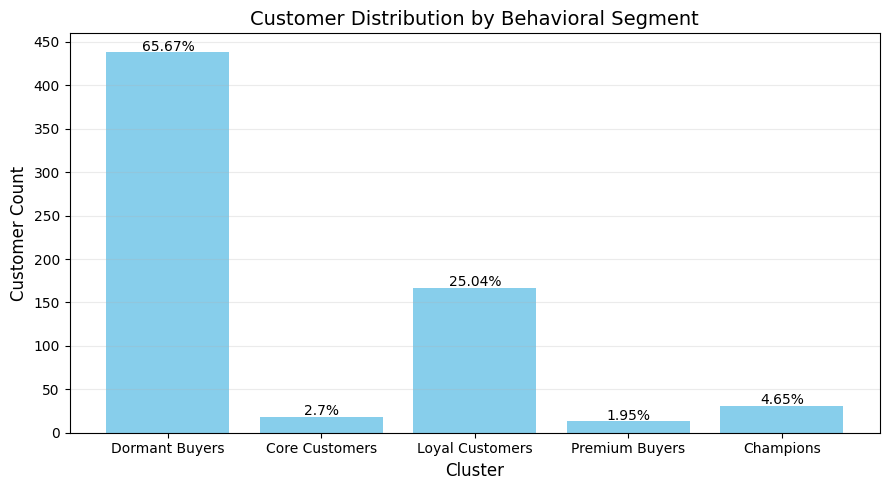

In [103]:
# plot the count of clusters
cluster_counts = profiles.groupby(['cluster', 'cluster_name']).size().reset_index(name='count')
cluster_counts = cluster_counts.sort_values('cluster')

# add percentage labels
total_count = cluster_counts['count'].sum()
cluster_counts['percentage'] = (cluster_counts['count'] / total_count * 100).round(2)

plt.figure(figsize=(9, 5))

plt.bar(cluster_counts['cluster_name'], cluster_counts['count'], color='skyblue')

for i, row in cluster_counts.iterrows():
    plt.text(i, row['count'] + 2, f"{row['percentage']}%", ha='center', fontsize=10)

plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.title('Customer Distribution by Behavioral Segment', fontsize=14)
plt.xticks(range(len(cluster_counts)), cluster_counts['cluster_name'])
plt.yticks(range(0, cluster_counts['count'].max() + 50, 50))
plt.grid(axis='y', alpha=0.25)

plt.tight_layout()
plt.savefig("outputs/cluster_count.png")
plt.show()

- The customer base is dominated by lower- and mid-engagement segments, with a relatively small proportion of high-value customers. This indicates that while most customers are active at a basic level, a smaller elite segment contributes disproportionately to long-term value
- This distribution is typical of consumer businesses, where high-value customers form a minority of the base

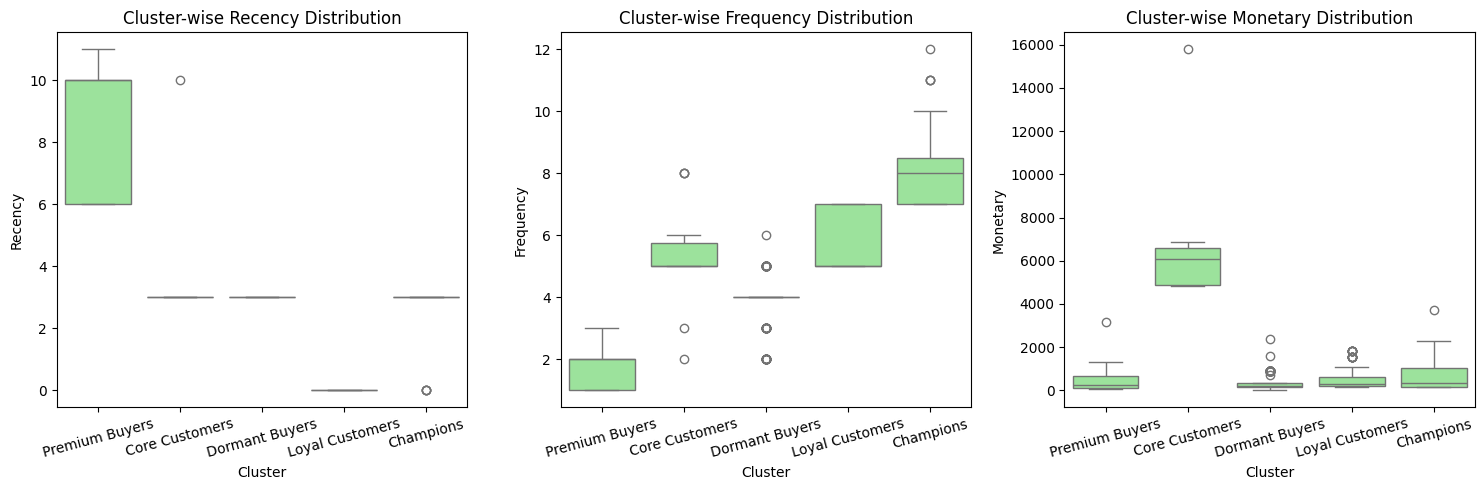

In [104]:
# consolidated boxplot for clusterwise rfm columns
rfm_columns = ['recency', 'frequency', 'monetary']

plt.figure(figsize=(15, 5))

for i, col in enumerate(rfm_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='cluster_name', y=col, data=profiles, color='lightgreen')
    plt.title(f'Cluster-wise {col.capitalize()} Distribution')
    plt.xlabel('Cluster')
    plt.ylabel(col.capitalize())
    plt.xticks(rotation=15)

plt.tight_layout()
plt.savefig("outputs/cluster_rfm_boxplots.png")

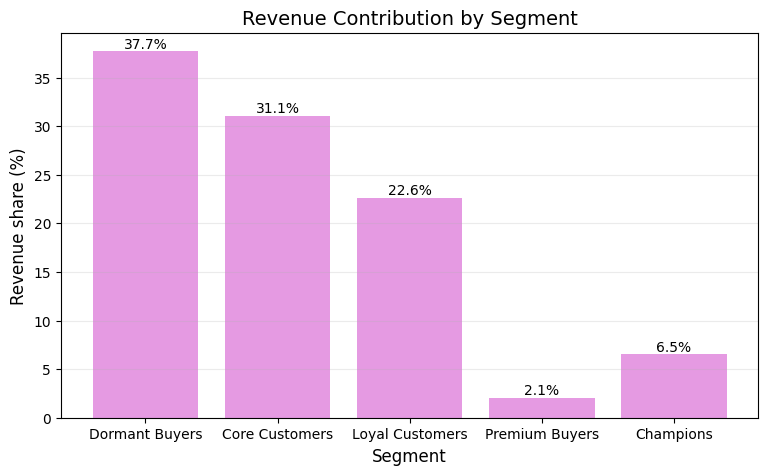

<Figure size 640x480 with 0 Axes>

In [147]:
rev = profiles.groupby("cluster_name")["monetary"].sum().reindex(cluster_names)
rev_share = rev / rev.sum() * 100

plt.figure(figsize=(9, 5))

plt.bar(rev_share.index.astype(str), rev_share.values, alpha=0.7, color='orchid')
plt.title("Revenue Contribution by Segment", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Revenue share (%)", fontsize=12)

for i, v in enumerate(rev_share.values):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.grid(axis="y", alpha=0.25)
plt.show()
plt.savefig("outputs/cluster_revenue_contribution.png")

- Revenue contribution is highly concentrated in the top segments. While Champions and Premium customers form a smaller share of the customer base, they contribute a disproportionately large share of total revenue, underscoring their strategic importance
- This imbalance highlights the importance of retention strategies for high-value segments, as small changes in their behavior can materially impact revenue

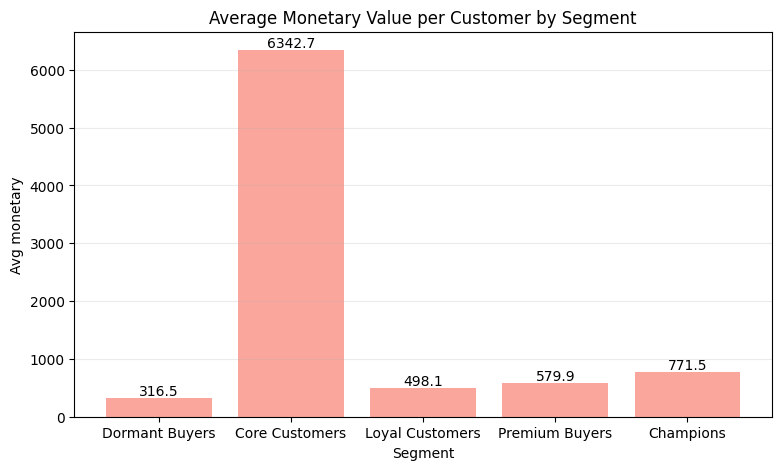

<Figure size 640x480 with 0 Axes>

In [146]:
avg_m = profiles.groupby("cluster_name")["monetary"].mean().reindex(cluster_names)

plt.figure(figsize=(9, 5))
plt.bar(avg_m.index.astype(str), avg_m.values, color='salmon', alpha=0.7)
plt.title("Average Monetary Value per Customer by Segment")
plt.xlabel("Segment")
plt.ylabel("Avg monetary")

for i, v in enumerate(avg_m.values):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom")

plt.grid(axis="y", alpha=0.25)
plt.show()
plt.savefig("outputs/cluster_avg_monetary.png")

- The average value per customer increases monotonically from Dormant to Champions. Premium and Champion customers generate substantially higher revenue per customer, indicating that customer quality — not just volume — differentiates segments
- Basically this answers: *If I retain or acquire one more customer from this segment, how much are they worth?*

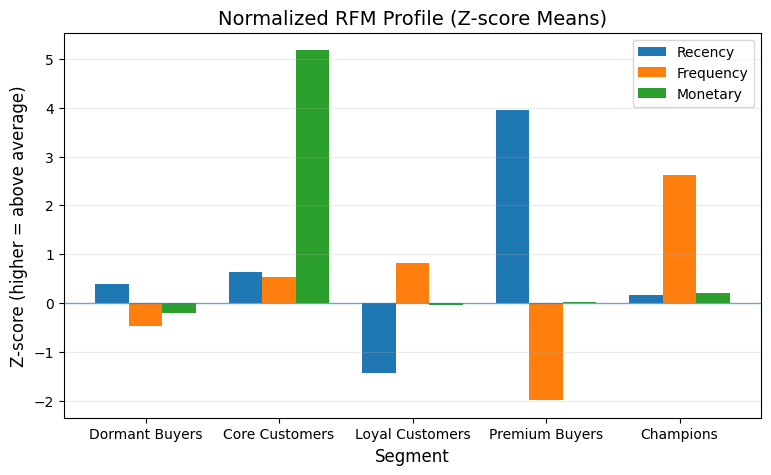

<Figure size 640x480 with 0 Axes>

In [107]:
rfm_cols = [c for c in ["recency", "frequency", "monetary"] if c in final.columns]

# z-score overall, then take cluster means (shape comparison)
z = profiles.copy()
for c in rfm_cols:
    z[c+"_z"] = (z[c] - z[c].mean()) / (z[c].std(ddof=0) + 1e-9)

z_means = z.groupby("cluster_name")[[c+"_z" for c in rfm_cols]].mean().reindex(cluster_names)

plt.figure(figsize=(9, 5))
x = np.arange(len(cluster_names))
w = 0.25

plt.bar(x - w, z_means["recency_z"].values, width=w, label="Recency")
plt.bar(x, z_means["frequency_z"].values, width=w, label="Frequency")
plt.bar(x + w, z_means["monetary_z"].values, width=w, label="Monetary")

plt.xticks(x, cluster_names)
plt.title("Normalized RFM Profile (Z-score Means)", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Z-score (higher = above average)", fontsize=12)
plt.axhline(0, linewidth=1, alpha=0.6)
plt.legend()
plt.grid(axis="y", alpha=0.25)
plt.show()
plt.savefig("outputs/cluster_rfm_zscore_means.png")

- The normalized RFM profiles show clear behavioral differentiation across segments
- Dormant customers underperform on all dimensions, while Champions consistently outperform across frequency and monetary value with strong recency
- Premium customers are primarily defined by high monetary value rather than frequency, whereas Loyal customers are driven by repeat engagement

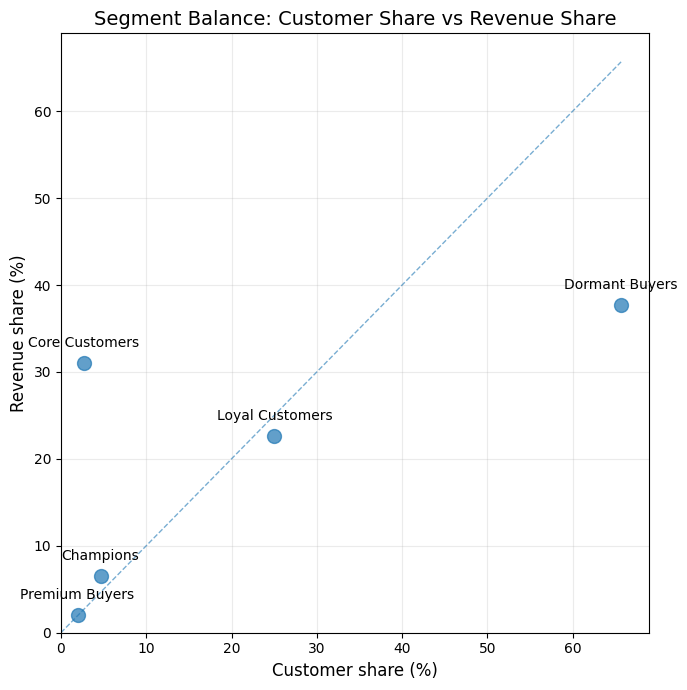

<Figure size 640x480 with 0 Axes>

In [112]:
counts = profiles["cluster_name"].value_counts().reindex(cluster_names)
pct = counts / counts.sum() * 100

cust_share = counts / counts.sum() * 100
rev_share = rev / rev.sum() * 100

plt.figure(figsize=(7, 7))
plt.scatter(cust_share.values, rev_share.values, s=100, alpha=0.7)

for name, x, y in zip(cluster_names, cust_share.values, rev_share.values):
    plt.text(x, y + 1.5, name, ha='center', va='bottom', fontsize=10)

# diagonal reference line
mx = max(cust_share.max(), rev_share.max())
plt.plot([0, mx], [0, mx], linestyle="--", linewidth=1, alpha=0.6)

plt.title("Segment Balance: Customer Share vs Revenue Share", fontsize=14)
plt.xlabel("Customer share (%)", fontsize=12)
plt.ylabel("Revenue share (%)", fontsize=12)
plt.xlim(0, mx * 1.05)  # Tighten right margin
plt.ylim(0, mx * 1.05)  # Tighten top margin
plt.grid(alpha=0.25)
plt.tight_layout()

plt.show()
plt.savefig("outputs/cluster_balance.png")

- Above diagonal = punches above its weight
- Below diagonal = volume-heavy, lower value density
- Champions and Premium segments generate a higher share of revenue than their share of customers, indicating high value density
- In contrast, Dormant and Core segments account for a large portion of customers but a smaller share of revenue, highlighting an opportunity for migration rather than direct monetization

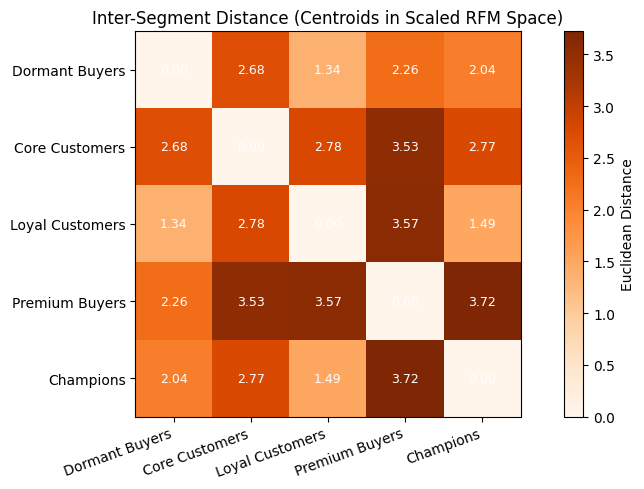

In [136]:
# Use cluster_analysis (already aggregated) instead of profiles (customer-level)
cent = cluster_analysis.reset_index()[["cluster", "cluster_name", "avg_recency", "avg_frequency", "avg_monetary"]].copy()
cent = cent.set_index("cluster_name").reindex(cluster_names)

# scale centroids before distance (so units don't dominate)
M = cent[["avg_recency", "avg_frequency", "avg_monetary"]].values.astype(float)
M = (M - M.mean(axis=0)) / (M.std(axis=0, ddof=0) + 1e-9)

# pairwise distances
dist = np.sqrt(((M[:, None, :] - M[None, :, :]) ** 2).sum(axis=2))

plt.figure(figsize=(9, 5))
plt.imshow(dist, cmap="Oranges")
plt.title("Inter-Segment Distance (Centroids in Scaled RFM Space)")
plt.xticks(range(len(cluster_names)), cluster_names, rotation=20, ha="right")
plt.yticks(range(len(cluster_names)), cluster_names)

for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        plt.text(j, i, f"{dist[i, j]:.2f}", ha="center", va="center", color="white", fontsize=9)

plt.colorbar(label="Euclidean Distance")
plt.tight_layout()
plt.savefig("outputs/cluster_intersegment_distance.png")
plt.show()

- Inter-cluster distances indicate clear separation between customer segments, particularly between low-engagement and high-value groups
- This confirms that the segmentation captures materially different customer behaviors rather than arbitrary splits

In [137]:
segment_summary = pd.DataFrame({
    "Segment": cluster_names,
    "Primary signal": [
        "Low activity / low value",
        "Baseline repeat buyers",
        "High repeat activity",
        "High value per buyer",
        "Top value + top activity"
    ],
    "Typical action": [
        "Re-engage / winback",
        "Nurture / maintain",
        "Retain / loyalty",
        "Upsell / cross-sell",
        "Protect / VIP perks"
    ]
})
segment_summary


,Segment,Primary signal,Typical action
0,Dormant Buyers,Low activity / low value,Re-engage / winback
1,Core Customers,Baseline repeat buyers,Nurture / maintain
2,Loyal Customers,High repeat activity,Retain / loyalty
3,Premium Buyers,High value per buyer,Upsell / cross-sell
4,Champions,Top value + top activity,Protect / VIP perks
